In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

%matplotlib inline
sns.set_style("white")

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Ames = pd.read_csv('train.csv', keep_default_na=False,na_values='')
Ames = Ames.drop(['Id', 'PID'], axis=1)

Ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


###  eda

In [3]:
Ames.shape

(2051, 79)

In [4]:
for each in Ames.columns:
    if Ames[each].isnull().sum() > 0:
        print(each,'is missing', Ames[each].isnull().sum(), 'observation points.')

Lot Frontage is missing 330 observation points.
Mas Vnr Type is missing 22 observation points.
Mas Vnr Area is missing 22 observation points.
Bsmt Qual is missing 1 observation points.
Bsmt Cond is missing 1 observation points.
Bsmt Exposure is missing 4 observation points.
BsmtFin Type 1 is missing 1 observation points.
BsmtFin SF 1 is missing 1 observation points.
BsmtFin Type 2 is missing 2 observation points.
BsmtFin SF 2 is missing 1 observation points.
Bsmt Unf SF is missing 1 observation points.
Total Bsmt SF is missing 1 observation points.
Bsmt Full Bath is missing 2 observation points.
Bsmt Half Bath is missing 2 observation points.
Garage Yr Blt is missing 114 observation points.
Garage Finish is missing 1 observation points.
Garage Cars is missing 1 observation points.
Garage Area is missing 1 observation points.
Garage Qual is missing 1 observation points.
Garage Cond is missing 1 observation points.


#### numerical variables

In [5]:
#  list of numerical variables
numerical = [each for each in Ames.columns if Ames[each].dtype=='int64' or Ames[each].dtype=='float64']
print(f'There are {len(numerical)} numerical variables')
Ames[numerical].head()

There are 37 numerical variables


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


In [6]:
# Ames.dropna(subset=['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area'],axis=0, inplace=True)

#### categorical variables

In [7]:
categorical = [each for each in Ames.columns if Ames[each].dtype=='object']
print(f'There are {len(categorical)} categorical variables')
Ames[categorical].head()

There are 42 categorical variables


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD


In [8]:
# Ames.dropna(subset=['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Finish', 'Garage Qual', 'Garage Qual'], axis=0,inplace=True)

#### temporal variables

In [9]:
year_data = [each for each in numerical if 'Yr' in each or 'Year' in each]
Ames[year_data].head()

,Year Built,Year Remod/Add,Garage Yr Blt,Yr Sold
0,1976,2005,1976.0,2010
1,1996,1997,1997.0,2009
2,1953,2007,1953.0,2010
3,2006,2007,2007.0,2010
4,1900,1993,1957.0,2010


In [10]:
Ames['Year Built'] = Ames['Yr Sold'] - Ames['Year Built']
Ames['Year Remod/Add'] = Ames['Yr Sold'] - Ames['Year Remod/Add']
Ames['Garage Yr Blt'] = Ames['Yr Sold'] - Ames['Garage Yr Blt']

Ames[['Year Built', 'Year Remod/Add', 'Garage Yr Blt']].head()

,Year Built,Year Remod/Add,Garage Yr Blt
0,34,5,34.0
1,13,12,12.0
2,57,3,57.0
3,4,3,3.0
4,110,17,53.0


Instead of the "year", now we have the amount of **years that passed** since the house was built or remodeled and the house was sold. Later we will drop the YrSold variable from the datasets, because we already extracted its value.

In [11]:
# Ames['TotalLivingSF'] = Ames['Gr Liv Area'] + Ames['Total Bsmt SF'] - Ames['Low Qual Fin SF']

In [12]:
# Ames['TotalLivingSF'] = Ames['TotalLivingSF'].mean()

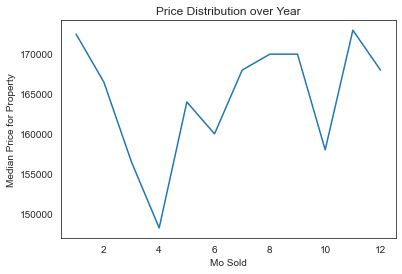

In [13]:
Ames.groupby('Mo Sold')['SalePrice'].median().plot()
plt.title('Price Distribution over Year')
plt.ylabel('Median Price for Property');

#### discrete variables

In [14]:
# let's visualise the values of the discrete variables
discrete = []

for each in numerical:
    if len(Ames[each].unique()) < 20 and each not in year_data:
        print(each,' values - ', Ames[each].unique())
        discrete.append(each)
print()
print(f'There are {len(discrete)} discrete variables')

MS SubClass  values -  [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
Overall Qual  values -  [ 6  7  5  8 10  4  9  3  2  1]
Overall Cond  values -  [8 5 7 6 3 9 2 4 1]
Bsmt Full Bath  values -  [ 0.  1.  2. nan  3.]
Bsmt Half Bath  values -  [ 0.  1. nan  2.]
Full Bath  values -  [2 1 3 0 4]
Half Bath  values -  [1 0 2]
Bedroom AbvGr  values -  [3 4 2 5 1 0 6 8]
Kitchen AbvGr  values -  [1 2 0 3]
TotRms AbvGrd  values -  [ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]
Fireplaces  values -  [0 1 2 4 3]
Garage Cars  values -  [ 2.  1.  3.  0.  4.  5. nan]
Pool Area  values -  [  0 519 576 800 228 480 648 738 368 561]
Mo Sold  values -  [ 3  4  1  6  5  9  7  2 12 10 11  8]

There are 14 discrete variables


#### continuous variables

In [15]:
numerical = [each for each in numerical if each not in discrete and each not in ['SalePrice'] and each not in year_data]
print(f'There are {len(numerical)} numerical and continuous variables')

There are 18 numerical and continuous variables


#### outliers and distributions

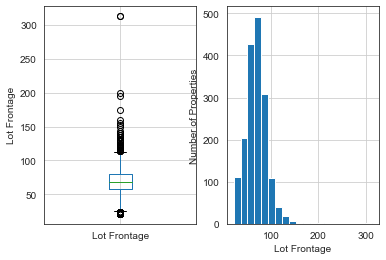

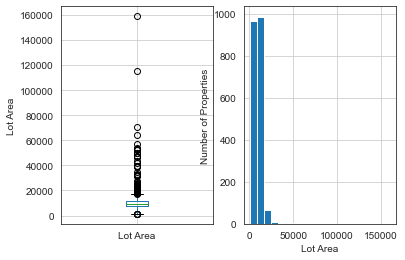

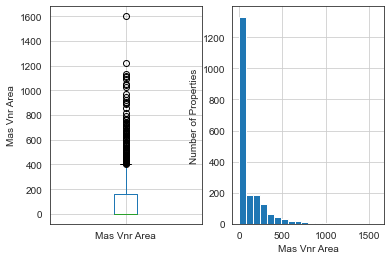

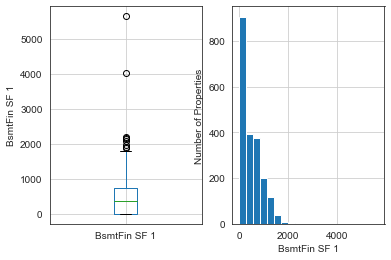

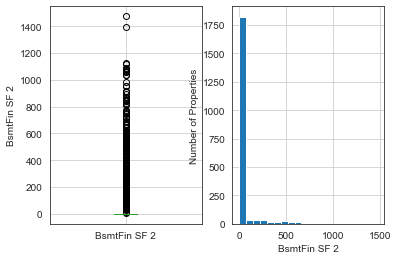

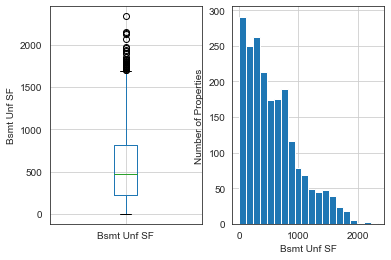

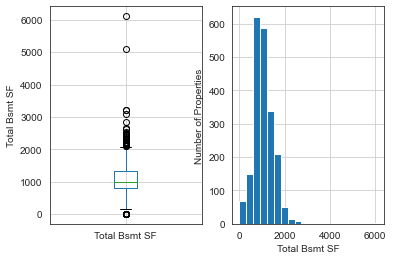

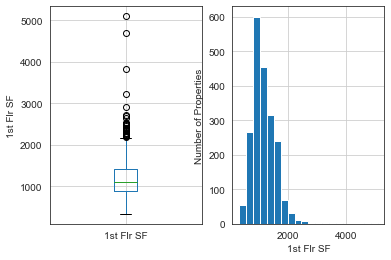

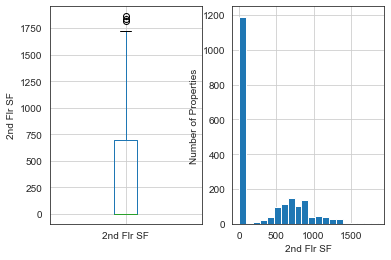

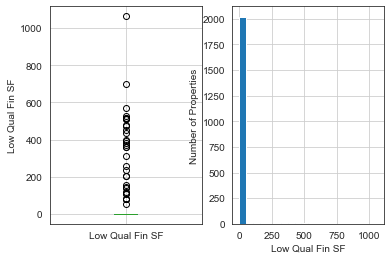

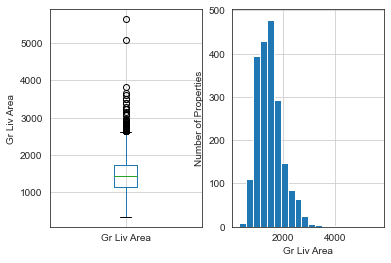

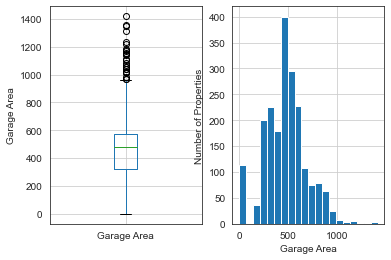

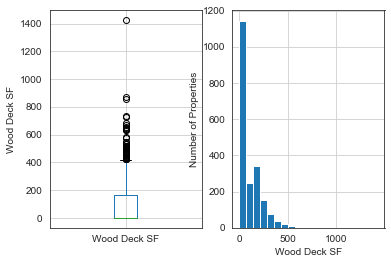

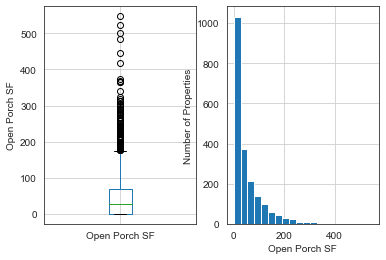

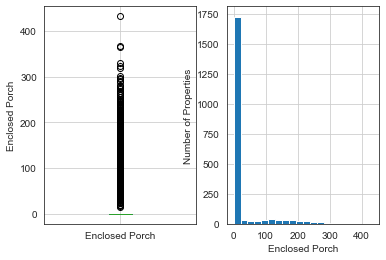

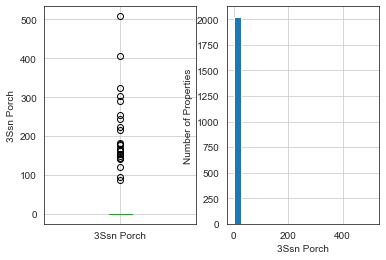

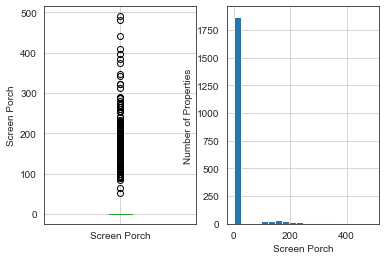

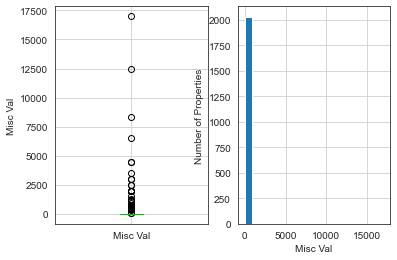

In [16]:
for each in Ames[numerical]:
    plt.figure(figsize=(6,4))
    plt.subplot(1, 2, 1)
    fig = Ames.boxplot(column=each)
    fig.set_title('')
    fig.set_ylabel(each)
    
    plt.subplot(1, 2, 2)
    fig = Ames[each].hist(bins=20)
    fig.set_ylabel('Number of Properties')
    fig.set_xlabel(each)

    plt.show()

#### outliers in discrete variables

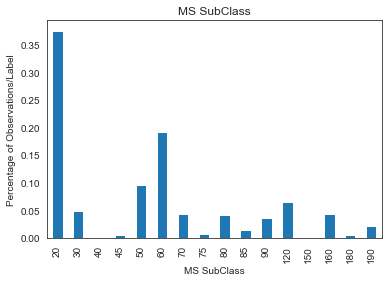

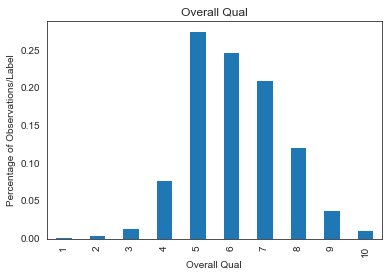

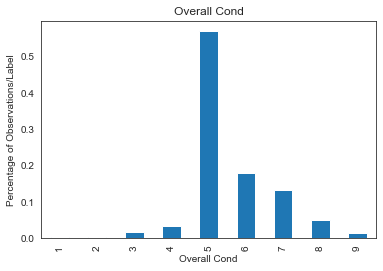

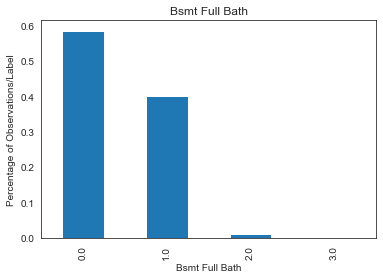

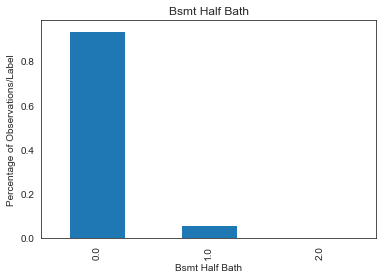

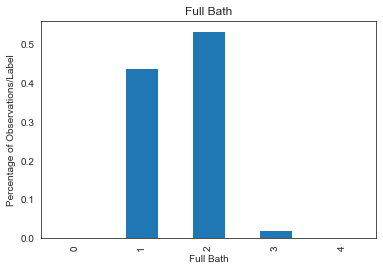

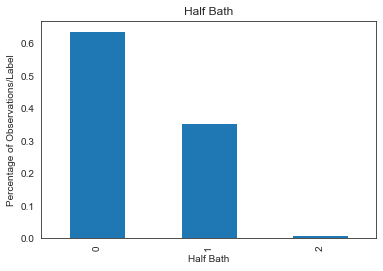

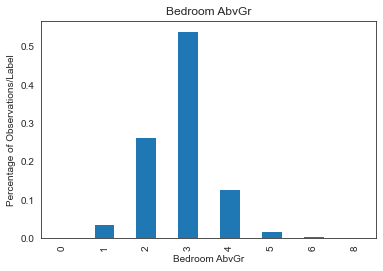

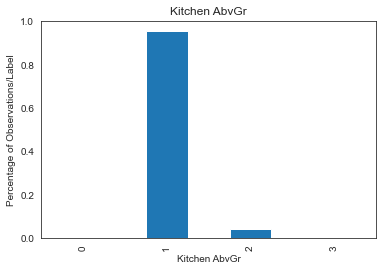

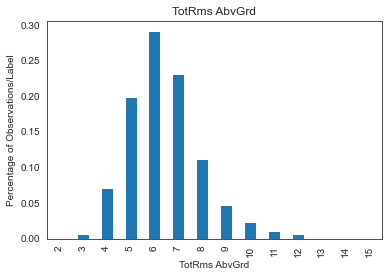

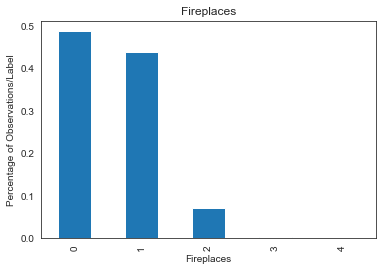

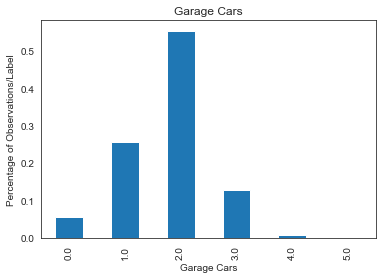

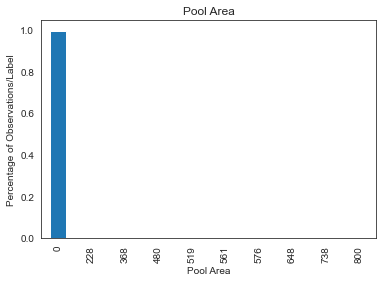

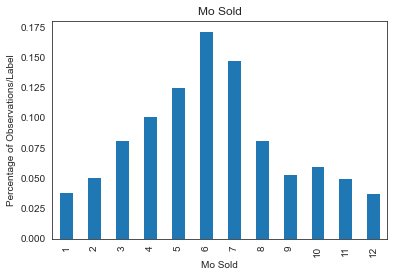

In [17]:
for each in discrete:
    (Ames.groupby(each)[each].count() / np.float(len(Ames))).plot.bar()
    plt.ylabel('Percentage of Observations/Label')
    plt.title(each)
    plt.show()

#### cardinality check

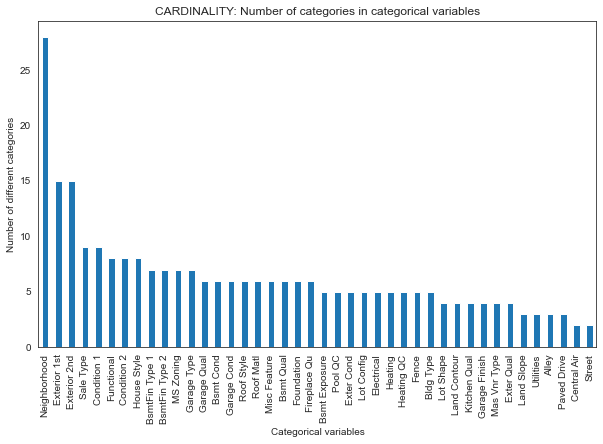

In [18]:
Ames[categorical].nunique().sort_values(ascending=False).plot.bar(figsize=(10,6))
plt.title('CARDINALITY: Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories');

# most of the variables contain few labels so no high cardinality

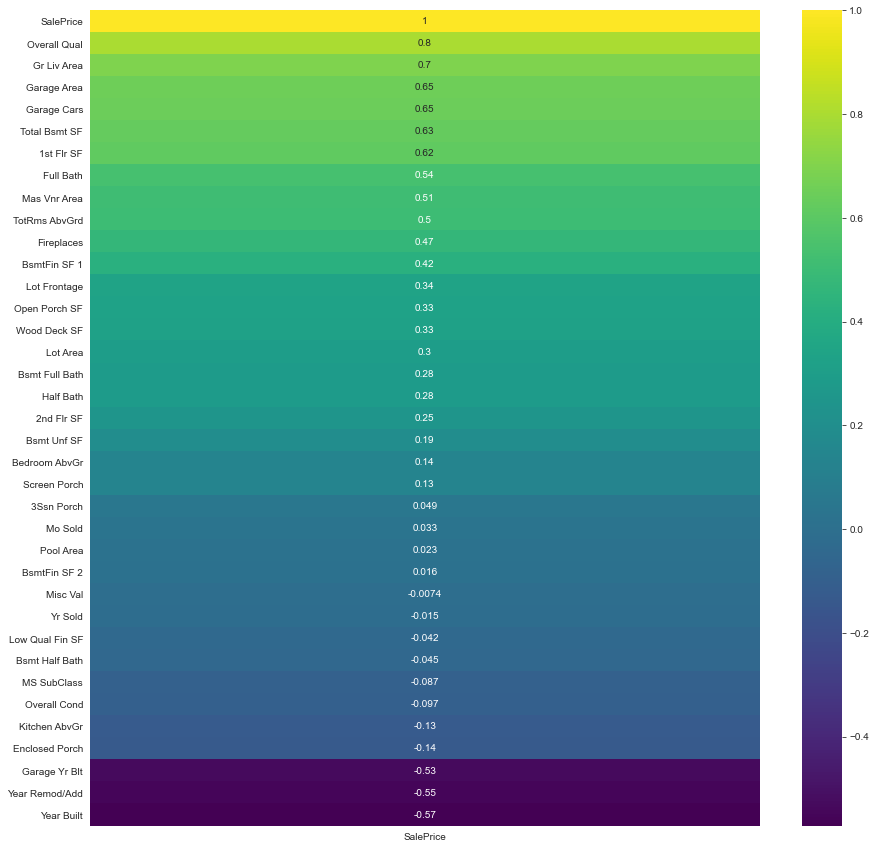

In [19]:
plt.figure(figsize=(15,15))
corr = Ames.corr().sort_values(['SalePrice'], ascending=False)
sns.heatmap(corr[['SalePrice']],annot=True, cmap='viridis');

In [20]:
Ames.drop('Yr Sold', axis=1,inplace=True)

In [21]:
for each in Ames[numerical].columns:
    if Ames[each].isnull().sum() > 0:
        print(each,'is missing', Ames[each].isnull().sum(), 'observations.')

Lot Frontage is missing 330 observations.
Mas Vnr Area is missing 22 observations.
BsmtFin SF 1 is missing 1 observations.
BsmtFin SF 2 is missing 1 observations.
Bsmt Unf SF is missing 1 observations.
Total Bsmt SF is missing 1 observations.
Garage Area is missing 1 observations.


In [22]:
# Ames[Ames[categorical].isna().any(axis=1)]

In [23]:
median_imput = MeanMedianImputer(imputation_method='median')

In [24]:
Ames = median_imput.fit_transform(Ames)

In [25]:
Ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type,SalePrice
0,60,RL,68.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,34,5,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,34.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,WD,130500
1,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,13,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,12.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,WD,220000
2,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,57,3,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,57.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,WD,109000
3,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,4,3,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,3.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,WD,174000
4,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,110,17,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,53.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,WD,138500


In [26]:
for each in Ames[categorical].columns:
    if Ames[each].isnull().sum() > 0:
        print(each,'is missing', Ames[each].isnull().sum(), 'observations.')

Mas Vnr Type is missing 22 observations.
Bsmt Qual is missing 1 observations.
Bsmt Cond is missing 1 observations.
Bsmt Exposure is missing 4 observations.
BsmtFin Type 1 is missing 1 observations.
BsmtFin Type 2 is missing 2 observations.
Garage Finish is missing 1 observations.
Garage Qual is missing 1 observations.
Garage Cond is missing 1 observations.


In [27]:
cat_imput = CategoricalImputer()

In [28]:
Ames = cat_imput.fit_transform(Ames)

In [29]:
for each in Ames.columns:
    if Ames[each].isnull().sum() > 0:
        print(each,'is missing', Ames[each].isnull().sum(), 'observations.')

In [30]:
ord_encoder = OrdinalEncoder()
Ames[categorical] = ord_encoder.fit_transform(Ames[categorical])

In [31]:
Ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type,SalePrice
0,60,5.0,68.0,13517,1.0,1.0,0.0,3.0,0.0,1.0,0.0,22.0,5.0,2.0,0.0,5.0,6,8,34,5,1.0,1.0,6.0,9.0,1.0,289.0,2.0,4.0,1.0,6.0,6.0,5.0,2.0,533.0,7.0,0.0,192.0,725.0,0.0,0.0,1.0,4.0,725,754,0,1479,0.0,0.0,2,1,3,1,2.0,6,7.0,0,3.0,1.0,34.0,3.0,2.0,475.0,6.0,6.0,2.0,0,44,0,0,0,0,3.0,4.0,2.0,0,3,8.0,130500
1,60,5.0,43.0,11492,1.0,1.0,0.0,3.0,0.0,1.0,0.0,23.0,2.0,2.0,0.0,5.0,7,5,13,12,1.0,1.0,12.0,12.0,1.0,132.0,2.0,4.0,2.0,2.0,6.0,5.0,2.0,637.0,7.0,0.0,276.0,913.0,0.0,0.0,1.0,4.0,913,1209,0,2122,1.0,0.0,2,1,4,1,2.0,8,7.0,1,5.0,1.0,12.0,3.0,2.0,559.0,6.0,6.0,2.0,0,74,0,0,0,0,3.0,4.0,2.0,0,4,8.0,220000
2,20,5.0,68.0,7922,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,5,7,57,3,1.0,1.0,12.0,12.0,3.0,0.0,3.0,2.0,1.0,6.0,6.0,5.0,2.0,731.0,7.0,0.0,326.0,1057.0,0.0,4.0,1.0,4.0,1057,0,0,1057,1.0,0.0,1,0,3,1,2.0,5,7.0,0,3.0,5.0,57.0,4.0,1.0,246.0,6.0,6.0,2.0,0,52,0,0,0,0,3.0,4.0,2.0,0,1,8.0,109000
3,60,5.0,73.0,9802,1.0,1.0,3.0,3.0,0.0,4.0,0.0,26.0,2.0,2.0,0.0,5.0,5,5,4,3,1.0,1.0,12.0,12.0,3.0,0.0,3.0,4.0,2.0,2.0,6.0,5.0,7.0,0.0,7.0,0.0,384.0,384.0,0.0,2.0,1.0,4.0,744,700,0,1444,0.0,0.0,2,1,3,1,3.0,7,7.0,0,3.0,3.0,3.0,0.0,2.0,400.0,6.0,6.0,2.0,100,0,0,0,0,0,3.0,4.0,2.0,0,4,8.0,174000
4,50,5.0,82.0,14235,1.0,1.0,0.0,3.0,0.0,4.0,0.0,23.0,2.0,2.0,0.0,0.0,6,8,110,17,1.0,1.0,13.0,9.0,3.0,0.0,3.0,4.0,2.0,1.0,2.0,5.0,7.0,0.0,7.0,0.0,676.0,676.0,0.0,4.0,1.0,4.0,831,614,0,1445,0.0,0.0,2,0,3,1,3.0,6,7.0,0,3.0,5.0,53.0,4.0,2.0,484.0,6.0,6.0,0.0,0,59,0,0,0,0,3.0,4.0,2.0,0,3,8.0,138500


#### modeling

In [32]:
X = Ames.drop(columns=['SalePrice'])
y = Ames['SalePrice'] 

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train.shape, X_test.shape

((1435, 77), (616, 77))

In [33]:
# numerical.remove('Lot Frontage')
# Ames.drop('Lot Frontage', axis=1,inplace=True)

In [34]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [35]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [36]:
lreg = LinearRegression()

In [37]:
lreg.fit(X_train, y_train)

LinearRegression()

#### linear regression model

In [38]:
lreg.score(X_train, y_train), lreg.score(X_test, y_test)


# significant overfitting. not surprised considering I dropped 0 variables

(0.8649371592185349, -5.843674517784175e+18)

In [39]:
lreg.score(X_test, y_test)

-5.843674517784175e+18

In [41]:
# X_test_preds = X_test.predict(X_test)

#### lasso regression model

In [42]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=200000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train, y_train);

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 964224330.607666, tolerance: 757114174.0296359
  model = cd_fast.enet_coordinate_descent_gram(
/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 964202499.7037354, tolerance: 757114174.0296359
  model = cd_fast.enet_coordinate_descent_gram(


In [43]:
lasso = Lasso(alpha=1.0)

In [44]:
lasso.fit(X_train, y_train)

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63145082554.24573, tolerance: 919317189.919265
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [45]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.8649254250038994, 0.8717978259125461)

In [46]:
X_train_preds = lasso.predict(X_train)

In [47]:
X_test_preds = lasso.predict(X_test)

In [48]:
# check model performance:

print('Train MSE is: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('Train RMSE is: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('Train R2 is: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('Test MSE is: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('Test RMSE is: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('Test R2 is: {}'.format(r2_score(y_test, X_test_preds)))

Train MSE is: 865340618.2226784
Train RMSE is: 29416.672453264975
Train R2 is: 0.8649254250038994

Test MSE is: 766319134.9475247
Test RMSE is: 27682.469812997624
Test R2 is: 0.8717978259125461


## 87% of the variation in sale price can be explained by the model

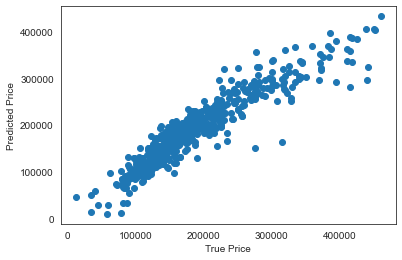

In [49]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price');

In [50]:
set(zip(X.columns, lasso.coef_))

{('1st Flr SF', 10267.877242800942),
 ('2nd Flr SF', 10118.764872846697),
 ('3Ssn Porch', 1350.2377939951448),
 ('Alley', -350.8087402472867),
 ('Bedroom AbvGr', -879.7146963518393),
 ('Bldg Type', -2483.487086377776),
 ('Bsmt Cond', 1186.6071928975002),
 ('Bsmt Exposure', -4752.6275068980685),
 ('Bsmt Full Bath', 4751.812926117925),
 ('Bsmt Half Bath', -171.2836802850495),
 ('Bsmt Qual', -1909.0839550798232),
 ('Bsmt Unf SF', 1794.1814994957601),
 ('BsmtFin SF 1', 4747.563930782713),
 ('BsmtFin SF 2', 312.3306281443392),
 ('BsmtFin Type 1', -2694.0213479434215),
 ('BsmtFin Type 2', -1512.0954549498485),
 ('Central Air', -281.7672481635317),
 ('Condition 1', -435.189614261583),
 ('Condition 2', 513.5448130353249),
 ('Electrical', -702.8478996506539),
 ('Enclosed Porch', 1538.1409021768382),
 ('Exter Cond', 881.266548942722),
 ('Exter Qual', -8568.919675980427),
 ('Exterior 1st', -3936.7967318256774),
 ('Exterior 2nd', 2350.601933753433),
 ('Fence', -279.5518840333695),
 ('Fireplace Qu'

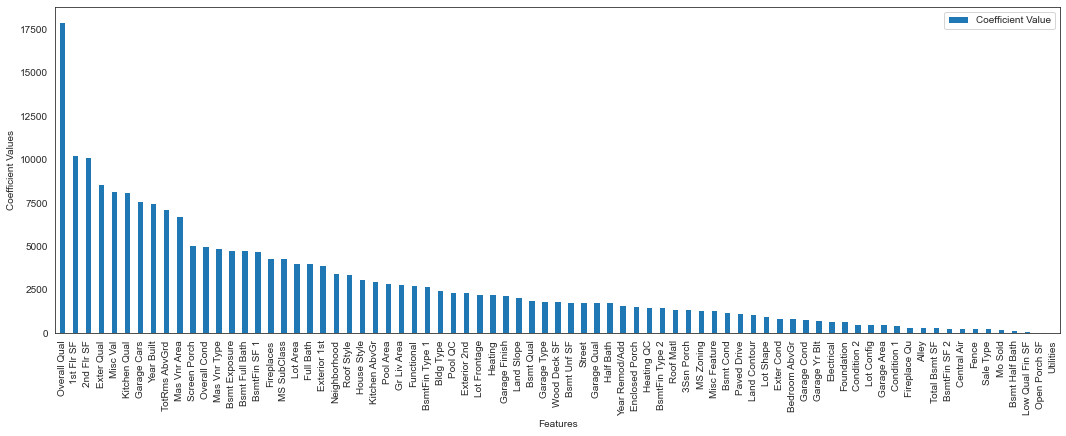

In [58]:
Influence = pd.DataFrame({
    'Features': X.columns,
    'Coefficient Value': np.abs(lasso.coef_)}).set_index('Features').sort_values('Coefficient Value', ascending=False)

Influence.sort_values(by ='Coefficient Value',inplace=True, ascending=False)
Influence.plot.bar(figsize=(18,6))
plt.ylabel('Coefficient Values');